# Project 8: NLP - Twitter US Airline Sentiment

**Background and Context:**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

**Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

**Dataset:**

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone

# Importing libraries and loading the data

In [103]:
# Importing Python libraries
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.
import wordcloud                                        # Import Wordcloud

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize                 # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import time

In [3]:
# Loading the dataset
data=pd.read_csv('Tweets.csv')

In [4]:
# Dataset overview
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# Dataset shape
data.shape

(14640, 15)

* The dataset includes 14,640 rows and 15 columns of tweets data

In [6]:
# Dataset description
data.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
# Check for null values
data.isnull().sum()  

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

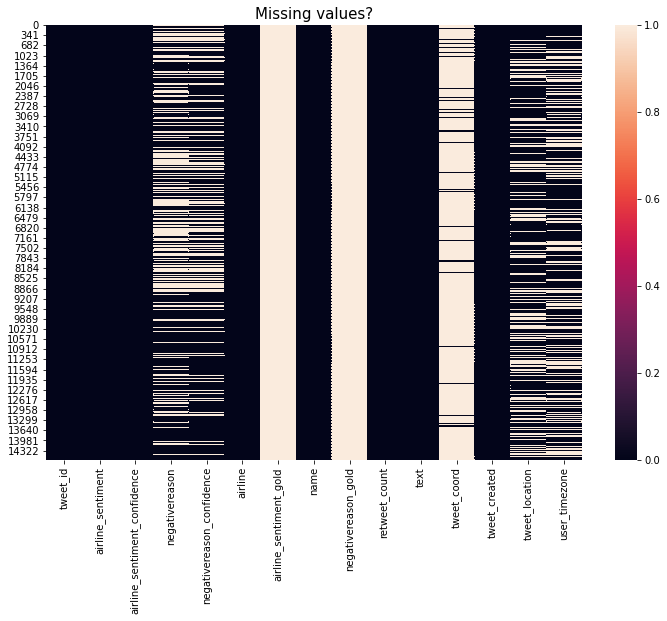

In [9]:
#Visualization of missing value using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull())                                  
plt.title("Missing values?", fontsize = 15)
plt.show()

* Some columns have missing values.
* However, the `airline_sentiment`, `airline` and `text` columns wich are going to be used thereafter do not have any missing values.

# Exploratory Data Analysis

### Distribution of tweets among each airline

In [10]:
# List of airline companies ranked by number of tweets (decreasing order)
airlines = list(data['airline'].value_counts().sort_values(ascending=False).keys())
print(airlines)

['United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America']


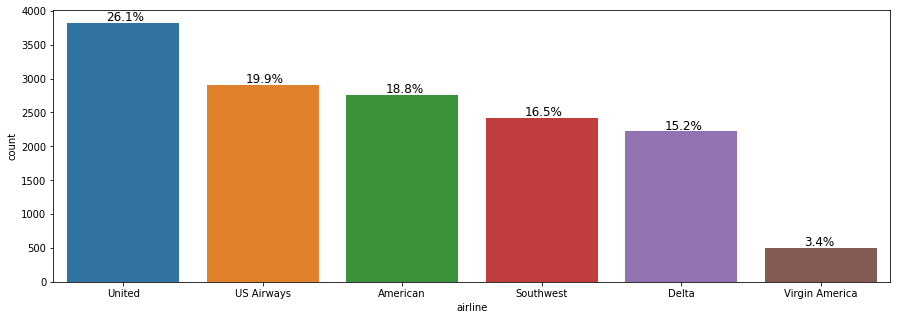

In [11]:
# Distribution of tweets among each airline
plt.figure(figsize=(15,5))
ax = sns.countplot(x='airline', data=data, order = airlines)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(data)) # percentage of each class of the category
        x = p.get_x() + 0.35 * p.get_width() # width of the plot
        y = p.get_height() + 30         # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage
plt.show();

* There are 6 US airline companies: United, US Airways, American, Southwest, Delta and Virgin America.
* The airline company with the most tweets is United accounting for 26% of all tweets.

### Distribution of sentiments across all the tweets

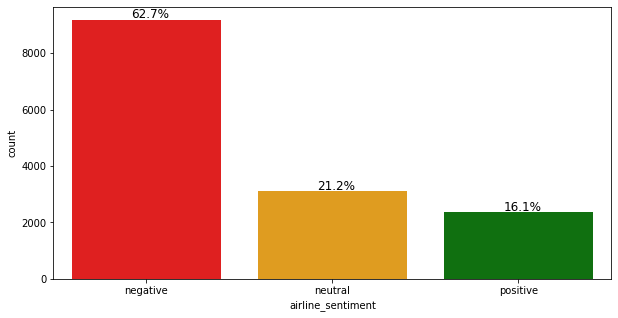

In [12]:
# Distribution of sentiments across all the tweets
plt.figure(figsize=(10,5))
ax = sns.countplot(x='airline_sentiment', 
                   data=data, 
                   palette={'positive': 'green', 'negative': 'red', 'neutral': 'orange'},
                   order=['negative', 'neutral','positive'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(data)) # percentage of each class of the category
        x = p.get_x() + 0.4 * p.get_width() # width of the plot
        y = p.get_height() + 60         # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage
plt.show();

From the chart above, we can see that the dataset is imbalanced with more negative reviews than neutral or positive reviews.

### Distribution of Sentiment of tweets for each airline

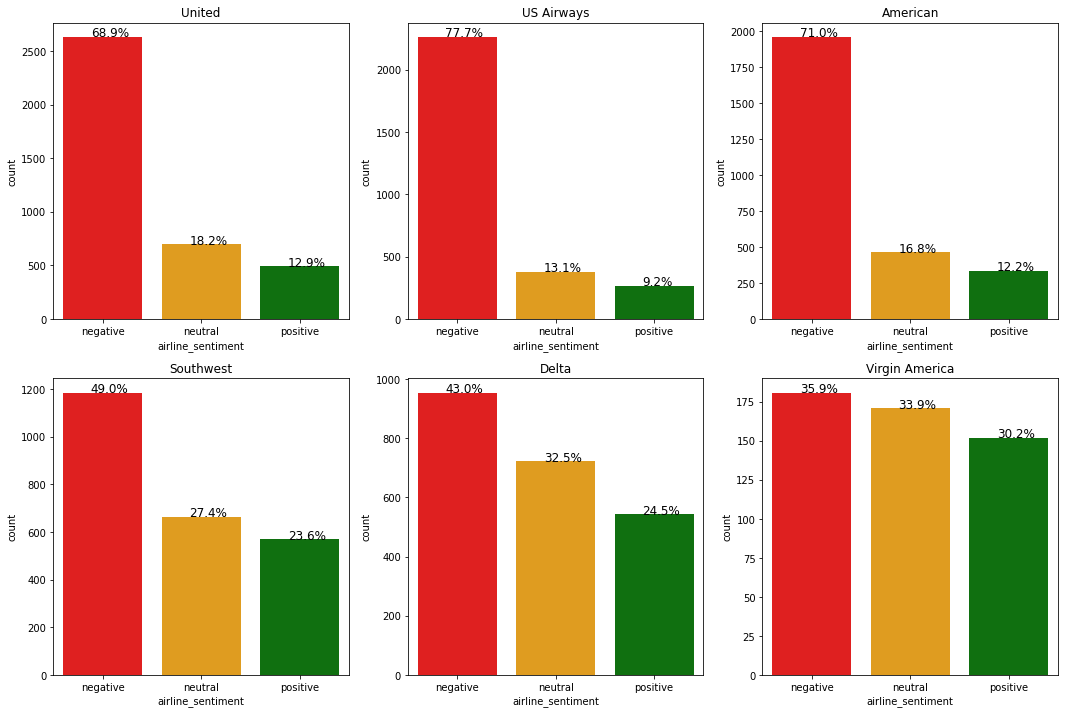

In [13]:
# Plotting sentiments for each airlines
plt.figure(figsize=(18,12))
for i, airline in enumerate(airlines):
    plt.subplot(2,3,i+1)
    plt.title(airline)
    ax=sns.countplot(x='airline_sentiment', 
                     data = data[data['airline'] == airline], 
                     palette={'positive': 'green', 'negative': 'red', 'neutral': 'orange'},
                     order=['negative', 'neutral','positive'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[data['airline'] == airline])) # percentage of each class of the category
        x = p.get_x() + 0.35 * p.get_width() # width of the plot
        y = p.get_height()         # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage
plt.show();

Among the 6 airline companies, US Airways is the company with the most negative reviews (77.7 %) while Virgin America is the company with the most positive reviews (30.2 %).

### Distribution of all the negative reasons

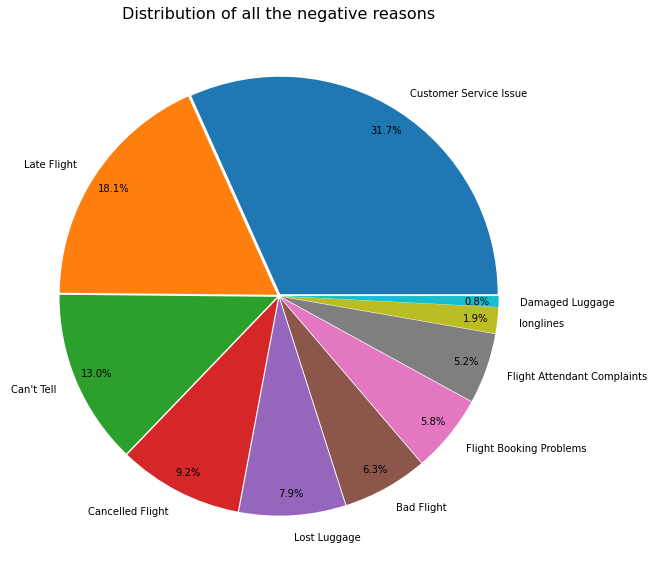

In [14]:
# Distribution of all the negative reasons
Category=data['negativereason'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,10))
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.01]*10, labels=labels, pctdistance=0.9)
plt.title("Distribution of all the negative reasons", fontsize=16);

* The `Customer Service Issue` is the most frequent reason for disappointment accounting for 31.7% of complaints.
* The `Damaged Luggage` is only accounting for 0.8% of complaints.

### Number of words in a tweet

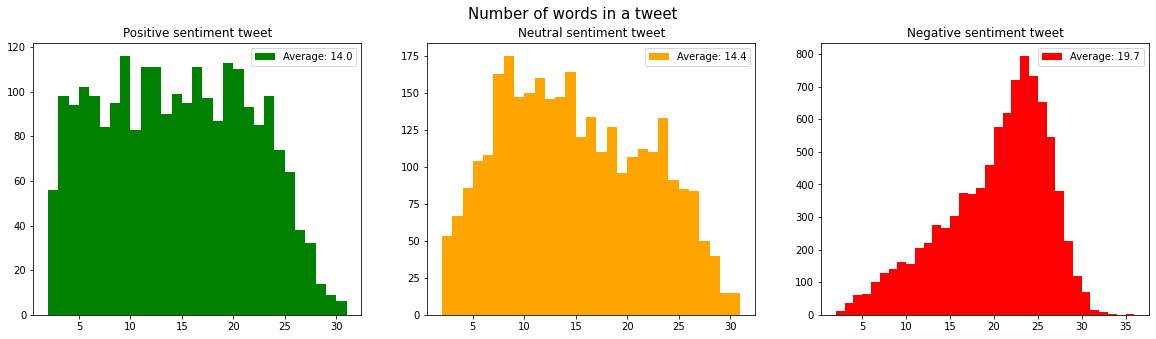

In [15]:
# Number of words in a tweet
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))

# Positive tweets
tweet_len = data[data['airline_sentiment']=='positive']['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='green', bins=tweet_len.max() - tweet_len.min(), label='Average: %0.1f' % tweet_len.mean())
ax1.set_title('Positive sentiment tweet')
ax1.legend(loc='upper right')

# Neutral tweets
tweet_len = data[data['airline_sentiment']=='neutral']['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len, color='orange', bins=tweet_len.max() - tweet_len.min(), label='Average: %0.1f' % tweet_len.mean())
ax2.set_title('Neutral sentiment tweet')
ax2.legend(loc='upper right')

# Negative tweets
tweet_len = data[data['airline_sentiment']=='negative']['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len, color='red', bins=tweet_len.max() - tweet_len.min(), label='Average: %0.1f' % tweet_len.mean())
ax3.set_title('Negative sentiment tweet')
ax3.legend(loc='upper right')

fig.suptitle('Number of words in a tweet', fontsize=15);

Looking at the number of words in the reviews, negative reviews show different distributions with more words being used on average.

### Word clouds before pre-processing

#### Tweets with positive sentiments

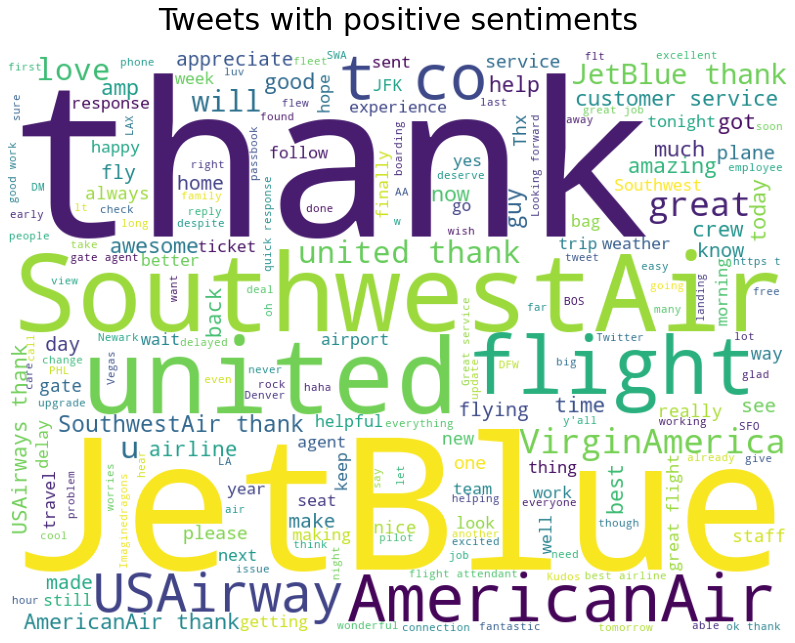

In [16]:
# Word cloud for tweets with positive sentiments
text = ''.join(data[data['airline_sentiment']=='positive']['text'].astype(str).tolist())
stopwords = set(wordcloud.STOPWORDS)
fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                                    colormap='viridis', width=800, height=600).generate(text)
plt.figure(figsize=(14,11), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title('Tweets with positive sentiments', fontsize=30, pad=20)
plt.show()

When looking at positive reviews, words such as *thank* or *JetBlue* are often used in the absence of pre-processing.

#### Tweets with negative sentiments

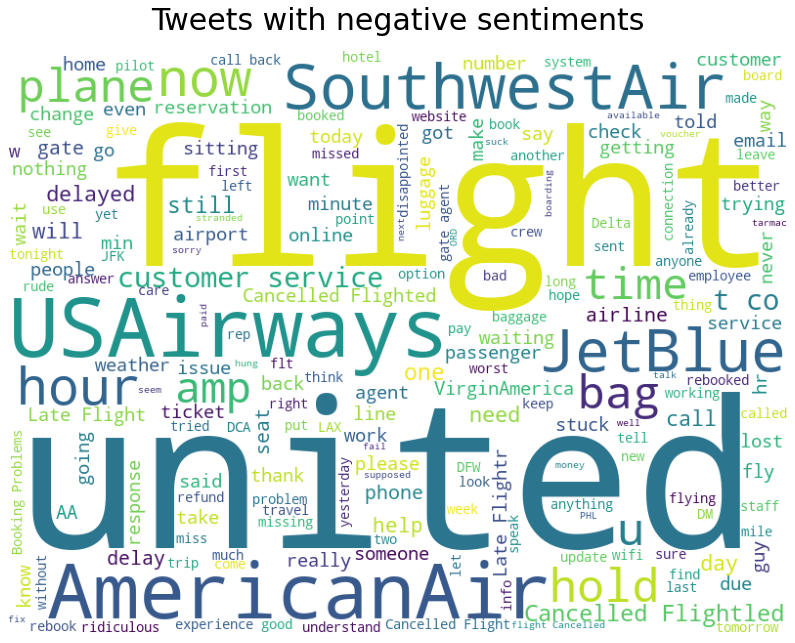

In [17]:
# Word cloud for tweets with negative sentiments
text = ''.join(data[data['airline_sentiment']=='negative']['text'].astype(str).tolist())
stopwords = set(wordcloud.STOPWORDS)
fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                                    colormap='viridis', width=800, height=600).generate(text)
plt.figure(figsize=(14,11), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title('Tweets with negative sentiments', fontsize=30, pad=20)
plt.show()

When looking at negative reviews, words such as *flight* or *united* are often used in the absence of pre-processing.

# Data columns selection

In [18]:
# Drop all other columns except “text” and “airline_sentiment”
data = data.loc[:,['text', 'airline_sentiment']]

In [19]:
# Data shape
data.shape

(14640, 2)

In [20]:
# Print the first 5 rows of data
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


# Text pre-processing: data preparation

During pre-processing, the following steps will be applied to the text data in order keep only the essential content:
* Html tag removal.
* Contractions replacement
* Tokenization.
* Removal of numbers.
* Removal of Special Characters and Punctuations.
* Conversion to lowercase.
* Removal of stopwords
* Lemmatization.
* Joining the words in the list

### HTML tags removal

In [21]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))

data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


### Contractions replacement

In [22]:
# Replace contractions in string of text
def replace_contractions(text):
    return contractions.fix(text)

In [23]:
data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


### Tokenization

In [24]:
data['text'] = data['text'].apply(lambda x: word_tokenize(x))
data.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


### Removal of numbers

In [25]:
def remove_numbers(words):
    """Remove numbers from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'\d+', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [26]:
data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


### Removal of Special Characters and Punctuations

In [27]:
# Remove special characters and punctuation from list of tokenized words
def remove_special_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [28]:
data['text'] = data['text'].apply(lambda x: remove_special_punctuation(x))
data.head()

,text,airline_sentiment
0,"[VirginAmerica, What, dhepburn, said]",neutral
1,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]",neutral
3,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


### Conversion to lower case

In [29]:
# Convert all characters to lowercase from list of tokenized words
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [30]:
data['text'] = data['text'].apply(lambda x: to_lowercase(x))
data.head()

,text,airline_sentiment
0,"[virginamerica, what, dhepburn, said]",neutral
1,"[virginamerica, plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[virginamerica, i, did, not, today, must, mean, i, need, to, take, another, trip]",neutral
3,"[virginamerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[virginamerica, and, it, is, a, really, big, bad, thing, about, it]",negative


### Removal of stopwords

In [31]:
# List of stopwords
print(stopwords)

{'we', 'were', 'he', 'yourselves', "you're", 'as', "you've", "can't", 'where', 'their', 'k', 'since', "who's", 'for', 'what', "we've", "won't", 'with', 'how', 'at', "they've", 'its', "you'd", 'else', "wasn't", 'in', 'only', 'yours', 'against', 'more', 'above', 'such', 'whom', 'otherwise', "doesn't", "why's", "they'll", "i've", 'because', 'between', 'before', 'cannot', 'have', "let's", 'yourself', 'do', 'few', 'ourselves', 'r', 'to', 'here', 'after', 'of', 'too', 'itself', 'can', "weren't", 'has', "i'd", 'on', 'also', 'just', "don't", 'him', 'each', 'our', 'therefore', 'off', 'any', 'had', 'http', 'an', 'no', "we'd", 'having', 'through', 'but', "shouldn't", 'over', 'very', 'from', 'all', "he's", 'and', 'hence', 'com', 'myself', 'she', 'is', 'so', 'the', 'am', 'i', "they're", 'be', 'this', 'those', "here's", 'some', 'shall', "what's", 'herself', 'why', 'than', 'himself', 'once', 'about', 'during', 'however', 'them', 'further', 'been', 'ours', 'could', 'out', "we'll", 'would', 'theirs', "

In [32]:
#Remove stop words from list of tokenized words
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

In [33]:
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))
data.head()

,text,airline_sentiment
0,"[virginamerica, dhepburn, said]",neutral
1,"[virginamerica, plus, added, commercials, experience, tacky]",positive
2,"[virginamerica, today, must, mean, need, take, another, trip]",neutral
3,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]",negative
4,"[virginamerica, really, big, bad, thing]",negative


### Lemmatization

In [34]:
lemmatizer = WordNetLemmatizer()

def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

In [35]:
data['text'] = data['text'].apply(lambda x: lemmatize_list(x))
data.head()

,text,airline_sentiment
0,"[virginamerica, dhepburn, say]",neutral
1,"[virginamerica, plus, add, commercials, experience, tacky]",positive
2,"[virginamerica, today, must, mean, need, take, another, trip]",neutral
3,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, face, little, recourse]",negative
4,"[virginamerica, really, big, bad, thing]",negative


### Joining the words in the list

In [36]:
# Joining words of a list
def join(words):
    return ' '.join(words)

In [37]:
data['text'] = data['text'].apply(lambda x: join(x))
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


### Word clouds after pre-processing

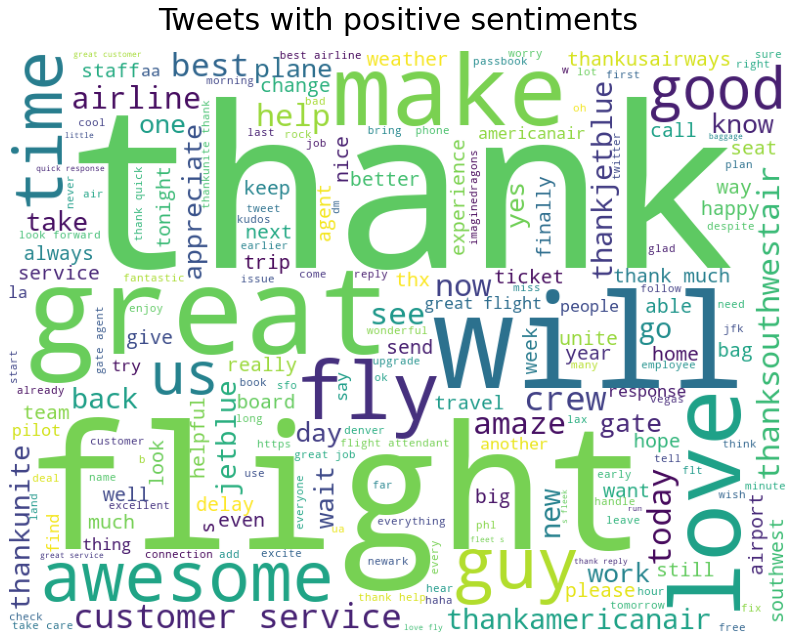

In [38]:
# Word cloud for tweets with positive sentiments
text = ''.join(data[data['airline_sentiment']=='positive']['text'].astype(str).tolist())
stopwords = set(wordcloud.STOPWORDS)
fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                                    colormap='viridis', width=800, height=600).generate(text)
plt.figure(figsize=(14,11), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title('Tweets with positive sentiments', fontsize=30, pad=20)
plt.show()

When looking at positive reviews after pre-processing, words such as *thank*, *great*, *awesome* or *love* are often used.

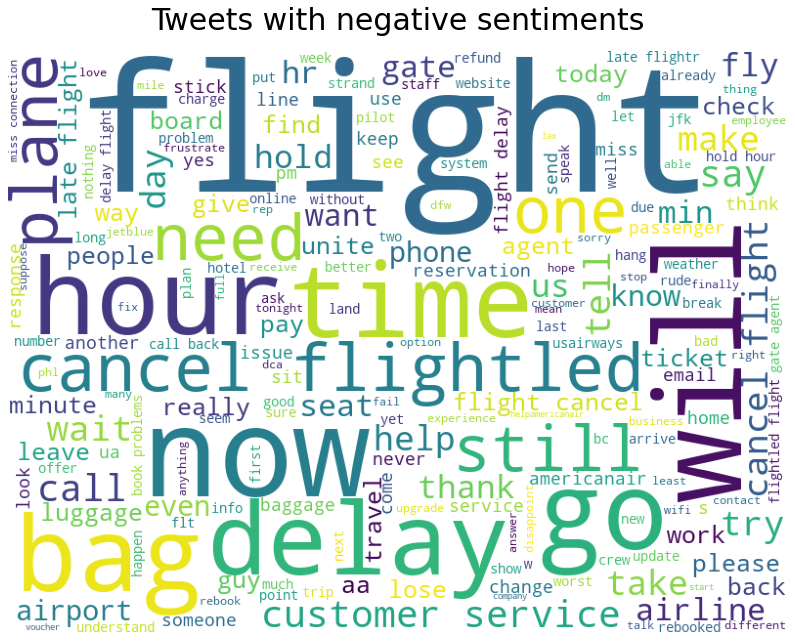

In [39]:
# Word cloud for tweets with negative sentiments
text = ''.join(data[data['airline_sentiment']=='negative']['text'].astype(str).tolist())
stopwords = set(wordcloud.STOPWORDS)
fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                                    colormap='viridis', width=800, height=600).generate(text)
plt.figure(figsize=(14,11), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title('Tweets with negative sentiments', fontsize=30, pad=20)
plt.show()

When looking at negative reviews after pre-processing, words such as *time*, *delay*, *bag* or *cancel* are often used.

# Modelling

Before using reviews in our classification model, we have to convert the text data into numbers using vectorization. Two different vectorization techniques will be used: **Count Vectorization** and **TfIdf Vectorization**. 

## Count Vectorizer

In [124]:
# Vectorization (Convert text data to numbers).
CV = CountVectorizer(max_features=1000)   # Limiting number of features to 1,000
data_features = CV.fit_transform(data['text'])
data_features = data_features.toarray()   

Only the most frequent 1,000 words have been kept in the features.

In [125]:
# Feature Vectors shape
data_features.shape

(14640, 1000)

In [126]:
# Labels encoding
replace = {'negative': -1, 'neutral': 0, 'positive': 1}
labels = data['airline_sentiment'].map(replace) # Replacing sentiment with integers
labels.value_counts()

-1    9178
 0    3099
 1    2363
Name: airline_sentiment, dtype: int64

The `airline_sentiment` has been converted to numbers (-1 for negative, 0 for neutral and 1 for positive sentiments) in order to be used by the model.

In [127]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.2, random_state=1, stratify=labels)

Tweet data has been split with 80% allocated to the train set and 20% to the test set.

### Random Forest classifier

In [128]:
# Using Random Forest to build model for the classification of sentiment.
# Also calculating the cross validation score.
start = time.time()

forest = RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=1) # Random forest with 10 trees
forest = forest.fit(X_train, y_train)

print(forest)

print('Average cross validation score: {:.1%}'.format(cross_val_score(forest, data_features, labels, cv=10).mean()))

end = time.time()
print('Run time: {:.1f} seconds'.format(end - start))

RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=1)
Average cross validation score: 70.1%
Run time: 15.9 seconds


* A random forest is used to classify the reviews into the 3 categories of sentiments.
* With 10 trees, an average cross validation score of 70.1% could be achieved on the train set.

### Optimizing the parameters: Number of trees in the random forest model (n_estimators)

In [94]:
# K-Fold Cross - validation .
start = time.time()
cv_scores = []
n_estimators = [1,2,3,5,7,10,15,20,30,40,50,100,200]
for n in n_estimators:
    clf = RandomForestClassifier(n_estimators = n, n_jobs=4, random_state=1)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())
end = time.time()
print('Run time: {:.1f} seconds'.format(end - start))

Run time: 201.6 seconds


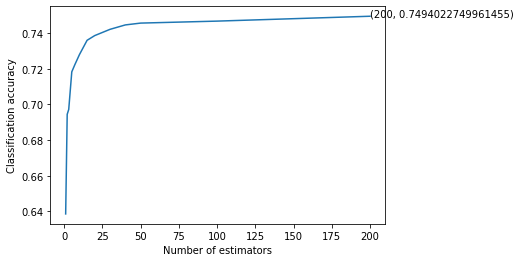

In [95]:
# Plotting the accuracy as number of estimators increases
optimal_learners = n_estimators[cv_scores.index(max(cv_scores))] #Optimal number of estimators for maximum accuracy.
plt.plot(n_estimators, cv_scores)                   #Plot between each num of estimators and misclassification accuracy
xy = (optimal_learners, max(cv_scores))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of estimators")
plt.ylabel("Classification accuracy")
plt.show()

The best accuracy (74.9 %) has been achieved with 200 trees in the random forest.

In [96]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners, random_state=1)
clf.fit(X_train, y_train)
print('Accuracy on test data: {:.1%}'.format(clf.score(X_test, y_test)))

Accuracy on test data: 75.6%


In [97]:
#saving the prediction on test data as a result
result =  clf.predict(X_test)                  

              precision    recall  f1-score   support

    negative       0.82      0.89      0.85      1836
     neutral       0.58      0.49      0.53       620
    positive       0.68      0.59      0.63       472

    accuracy                           0.76      2928
   macro avg       0.69      0.66      0.67      2928
weighted avg       0.75      0.76      0.75      2928



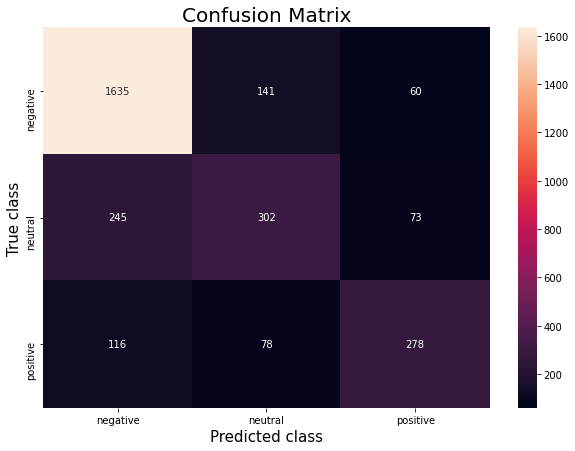

In [107]:
# Confusion matrix and classification report
cm = confusion_matrix(y_test, result)
print(classification_report(y_test, result, target_names=['negative', 'neutral', 'positive']))
df_cm = pd.DataFrame(cm, index =['negative', 'neutral', 'positive'], columns=['negative', 'neutral', 'positive'])      
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted class', fontsize=15)
plt.ylabel('True class', fontsize=15);

* An accuracy of 75.6% has been achieved on the test set.
* The recall for negative reviews is 89%.
* The imbalanced nature of the dataset makes it harder to predict.

### Top 40 features

In [99]:
all_features = CV.get_feature_names()   #Instantiate the feature from the vectorizer
top_features=''                         # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
print(top_features)

thank jetblue great delay flight usairways southwestair unite hours love cancel bag americanair awesome hold will call virginamerica now best time please hour service customer wait help fly go make get amaze still dm say need plane try tell phone 


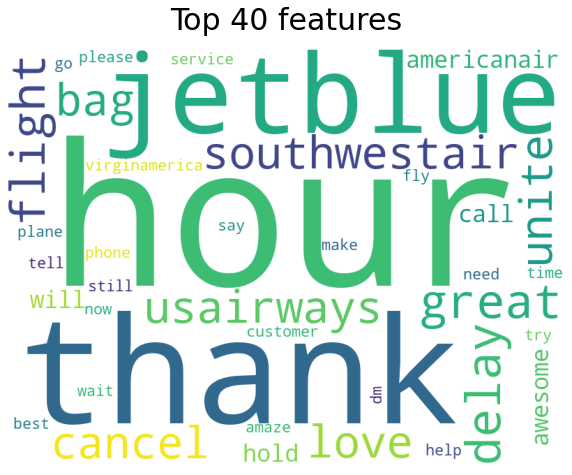

In [101]:
# Word cloud for top 40 features
stopwords = set(wordcloud.STOPWORDS)
fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                                    colormap='viridis', width=800, height=600).generate(top_features)
plt.figure(figsize=(10,10), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title('Top 40 features', fontsize=30, pad=20)
plt.show()

The four most important keywords to predict the sentiment are: *thank*, *jetblue*, *great* and *delay*.

## Tfidf Vectorizer

In [108]:
# Vectorization (Convert text data to numbers).
TV = TfidfVectorizer(max_features=1000)   # Limiting number of features to 1,000
data_features = TV.fit_transform(data['text'])
data_features = data_features.toarray()  

In [109]:
# Feature Vectors shape
data_features.shape

(14640, 1000)

In [110]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.2, random_state=1, stratify=labels)

### Random Forest Classifier

In [111]:
# Using Random Forest to build model for the classification of sentiment.
# Also calculating the cross validation score.
start = time.time()

forest = RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=1) # Random forest with 10 trees
forest = forest.fit(X_train, y_train)

print(forest)

print('Average cross validation score: {:.1%}'.format(cross_val_score(forest, data_features, labels, cv=10).mean()))

end = time.time()
print('Run time: {:.1f} seconds'.format(end - start))

RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=1)
Average cross validation score: 69.5%
Run time: 25.1 seconds


### Optimizing the parameters: Number of trees in the random forest model (n_estimators)

In [112]:
# K-Fold Cross - validation .
start = time.time()
cv_scores = []
n_estimators = [1,2,3,5,7,10,15,20,30,40,50,100,200]
for n in n_estimators:
    clf = RandomForestClassifier(n_estimators = n, n_jobs=4, random_state=1)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())
end = time.time()
print('Run time: {:.1f} seconds'.format(end - start))

Run time: 231.6 seconds


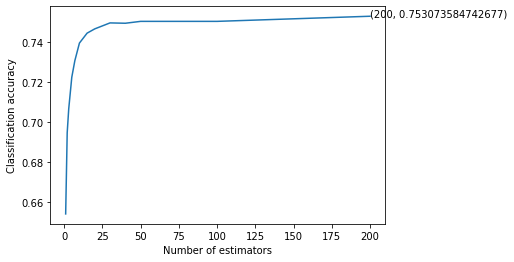

In [113]:
# Plotting the accuracy as number of estimators increases
optimal_learners = n_estimators[cv_scores.index(max(cv_scores))] #Optimal number of estimators for maximum accuracy.
plt.plot(n_estimators, cv_scores)                   #Plot between each num of estimators and misclassification accuracy
xy = (optimal_learners, max(cv_scores))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of estimators")
plt.ylabel("Classification accuracy")
plt.show()

The best accuracy (75.3 %) has been achieved with 200 trees in the random forest.

In [114]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners, random_state=1)
clf.fit(X_train, y_train)
print('Accuracy on test data: {:.1%}'.format(clf.score(X_test, y_test)))

Accuracy on test data: 76.5%


In [115]:
#Saving the prediction on test data as a result
result =  clf.predict(X_test)     

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1836
     neutral       0.63      0.42      0.51       620
    positive       0.74      0.56      0.64       472

    accuracy                           0.77      2928
   macro avg       0.72      0.64      0.67      2928
weighted avg       0.75      0.77      0.75      2928



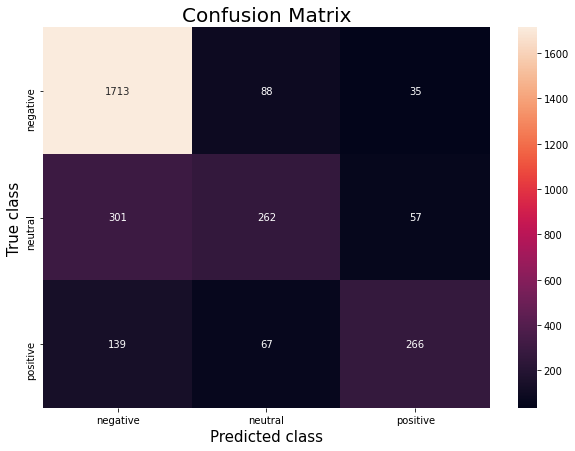

In [116]:
# Confusion matrix and classification report
cm = confusion_matrix(y_test, result)
print(classification_report(y_test, result, target_names=['negative', 'neutral', 'positive']))
df_cm = pd.DataFrame(cm, index =['negative', 'neutral', 'positive'], columns=['negative', 'neutral', 'positive'])      
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted class', fontsize=15)
plt.ylabel('True class', fontsize=15);

With the Tfidf Vectorizer, the performance of the model is slightly better than with the Count Vectorizer:
* Accuracy on the test data is 76.5% compared to 75.6% previously.
* Recall for negative sentiment prediction is also slightly better with 93% vs 89% previously.

### Top 40 features

In [117]:
all_features = TV.get_feature_names()   #Instantiate the feature from the vectorizer
top_features=''                         # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
print(top_features)

thank jetblue southwestair unite americanair usairways great flight virginamerica delay love will hours cancel awesome hold call bag dm please now best fly service amaze wait help good time customer appreciate make follow get hour go still yes tomorrow fleet 


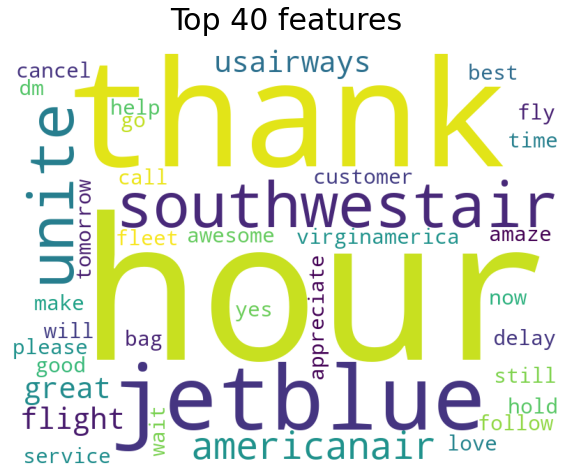

In [118]:
# Word cloud for top 40 features
stopwords = set(wordcloud.STOPWORDS)
fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                                    colormap='viridis', width=800, height=600).generate(top_features)
plt.figure(figsize=(10,10), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.title('Top 40 features', fontsize=30, pad=20)
plt.show()

* Compared to the Count Vectorizer, the keywords importance is different with the TfIdf Vectorizer
* The four most important keywords to predict the sentiment are now: *thank*, *jetblue*, *southwestair* and *unite*.

# Conclusions

- We used a dataset of 14,640 tweets from 6 US airline companies including **reviews** in text format as well as the **airline sentiment** ranked in 3 categories: positive, neutral or negative.
- The goal was to **build a model for text-classification**.
- We **pre-processed the data** using various techniques and libraries.
- We **created several Word Cloud plots** based on the keywords (top 40 most important features for classification) as well as the negative and positive sentiments.
- The **pre-processed data was converted to numbers with two different vectorization techniques (CountVectorizer and TfIdfVectorizer)** before being used in the classification model (Random Forest Classifier).
- We trained the model and optimized the parameters (number of trees), which **led to an increase in the overall accuracy and recall.**
- After building the classification model, we **predicted the results for the test data.** The best perforamance was achieved using the TfIdf Vectorizer with an overall accuracy of 76.5% and a recall of 93% on the negative sentiments. 
- We can also increase the **max_feature parameter** in the vectorizer. Currently this parameter has been limited to 1,000 features. A slightly better accuracy could be achieved with a higher number of features.
- We can apply **other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques** to increase the overall accuracy even further.